In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import decomposition
from sklearn import model_selection
from sklearn import tree
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFECV

In [2]:
def read_data(filepath):
    
    #Read the data from the csv file, to replicate the behavior on another mc, change the path of file accordingly
    print("------------------------Reading file from csv-----------------------------------------------")
    df = pd.read_csv(filepath, encoding='ISO-8859-1', delimiter = ',')
    
    #Set the display max option to desired rows and colwidth
    pd.set_option('display.max_colwidth',150)
    pd.set_option('display.max_rows', 181691)
    
    print("-----------------------Finished Reading the File-------------------------------------------")
    
    return df
    

In [3]:
def eda(df):
    
    print("---------------------Exploratory Data Analysis------------------------------------------------")
    print("type of df ", type(df))
    print("shape and size of df ", df.shape, df.size)
#     print("index of df ", df.index)
#     print("df.head(10) ", df.head(10))
#     print("df.tail(10)", df.tail(10))
#     print("df.info ", df.info)
#     print("df.describe ", df.describe)
#     print("df.columns ", df.columns)
#     print("df.dtypes ", df.dtypes)
#     print("Plot of Kills vs Years")
    

In [4]:
def explore_target(df):
    
    print("--------------------------- Exploring Target -----------------------------------------")
    dfGname = df['gname'].rank
#     print("Ranked gnames ", dfGname) # doesn't have head function
#     print(df['gname'].value_counts())

def reduction(df):    
    
    print("--------------------------- Reduction of Data ----------------------------------------")
    #drop rows which have gname as Unknown
    type(df['gname']) #pandas.core.series.Series
    # type('Unknown') #String

    # Get names of indexes for which column gname has value Unknown
    indexNames = df[ df['gname']=='Unknown' ].index
    print(len(indexNames))

    # Delete these row indexes from dataFrame
    df.drop(indexNames , inplace=True)
    print(df.shape)
#     print(df.head(5))  
    
    #Check if the above drop removed Unknown gname
    df['gname'].value_counts()
    
    #Select the top 10 terrorist groups per the no. of attacks they made
    gname_selected = df['gname'].value_counts().head(10)
    print("top 10 prolific gnames are",gname_selected)
    
    #reduce the df with these selected gname
    print("--------------------------Shape before Reduction ---------------------")
    print(df.shape)
    df = df.loc[df['gname'].isin(gname_selected.index)]
    print("--------------------------Shape after Reduction ---------------------")
    print(df.shape)

    print(df['gname'].head(5))
    
    
    return df

In [5]:
def preprocessing_data_1(df):
    
    print("---------------------preprocessing using various techniques-----------------------------------")
    
    #Preprocessing - Missing Values
    print("---------------------Removing and Imputing Missing Values-------------------------------------")
    removed_missing_val_df = missing_values(df)
    
    #Preprocessing - Encoding Categorial Features and Target
    print("---------------------Encoding--------------------------------")
    encoded_df = encoding(removed_missing_val_df)

def preprocessing_data_2(reduced_features_df):
    #Preprocessing - Checking Imbalance in Data
    check_imbalance(reduced_features_df, train_labels) 
    
    #Preprocessing - Checking Outliers
    outliers(train_features)    
    
    #Preprocessing - Scaling
    scaling(train_features)
    
    

In [6]:
def model(model_name, train_features,test_features, train_labels, test_labels):
    
    if(model_name == 'knn'):
        
        knn = KNeighborsClassifier()
        scores = model_selection.cross_val_score(knn , train_features , train_labels , cv=10)
        print ("scores.mean()" , scores.mean())
        param_grid = [ {'n_neighbors': list(range(1, 80)), 'p':[1, 2, 3, 4, 5] }]
        clf = GridSearchCV(KNeighborsClassifier (), param_grid , cv=10, n_jobs=-1)
        clf.fit(train_features , train_labels)
        
        print("n Best parameters set found on development set:")
        print(clf.best_params_ , "with a score of ", clf.best_score_)
        best_grid = grid_search.best_estimator_
#         scores.mean() 0.9712069548279167
#         n Best parameters set found on development set:
#         {'n_neighbors': 4, 'p': 1} with a score of  0.9821346398505806
        grid_accuracy = evaluate(best_grid, test_features, test_labels)
        print("best_grid", best_grid)
        print("grid_accuracy", grid_accuracy)
        
#         print (clf.score(test_features, test_labels)) 
    
    if(model_name == 'decision_tree'):
        
        decTree = DecisionTreeClassifier()
        scores = model_selection.cross_val_score(decTree , train_features , train_labels , cv=10)
        print ("scores.mean()" , scores.mean())
        param_grid = [ {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}]
        clf = GridSearchCV(DecisionTreeClassifier(), param_grid , cv=10, n_jobs=-1)
        clf.fit(train_features , train_labels)

        print("n Best parameters set found on development set:")
        print(clf.best_params_ , "with a score of ", clf.best_score_)
     
        accuracy = clf.score(test_features, test_labels)
        print ("Decision Tree Accuracy ", accuracy)
    
    if(model_name == 'random_forest'):
        #Random forest is an ensemble technique
        # Creating param grid
        
        param_grid = {
            'bootstrap': [True],
            'max_depth': [80, 100],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 5],
            'min_samples_split': [ 10, 15],
            'n_estimators': [100, 500, 1000]
        }
        
        rf = RandomForestClassifier()
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = 10, n_jobs = -1)
        grid_search.fit(train_features, train_labels)
        
        best_grid = grid_search.best_estimator_
        grid_accuracy = evaluate(best_grid, test_features, test_labels)
        print("best_grid", best_grid)
        print("grid_accuracy", grid_accuracy)
    
    #Model Persistence
    
    if(model_name == 'naive_bayes'):
        print("Using Naive Bayes")
        
        nBayes = GaussianNB()
        nBayes = nBayes.fit(train_features, train_labels)
        accuracy = nBayes.score(test_features, test_labels)
        print ("Naive Bayes Accuracy ", accuracy)

    
    if(model_name == 'svm'):
        print("Using SVM")
       
        svc = SVC(gamma='auto')
        svc = svc.fit(train_features, train_labels)
#         accuracy = svc.score(test_features, test_labels)
        accuracy = evaluate(svc, test_features, test_labels)
        print ("SVM Accuracy ", accuracy)  

# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

In [7]:
def evaluate(model, test_features, test_labels):
    
    y_preds = model.predict(test_features)

    # Accuracy Score using score method
    accuracy_score = model.score(test_features, test_labels)
    print ("Accuracy ", model, accuracy_score)
    
    # Confusion Matrix
    # Accuracy in machine learning algorithm is measured as:
    #               𝑇𝑟𝑢𝑒𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠+𝑇𝑟𝑢𝑒𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒𝑠
    #   --------------------------------------------------      
    # 𝑇𝑟𝑢𝑒𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠+𝐹𝑎𝑙𝑠𝑒𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠+𝑇𝑟𝑢𝑒𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒𝑠+𝐹𝑎𝑙𝑠𝑒𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒𝑠
    
    confusion_mat= confusion_matrix(y_true= test_labels , y_pred=y_preds)
    print('Confusion matrix:n', confusion_mat)
#     Error - Classification metrics can't handle a mix of unknown and multiclass targets
    
    # F1 score
    f1score = f1_score(test_labels,y_preds, average = 'micro') #average = binary doesn't work
    print("f1score is", f1score)
    
    # Classification Report which shows Precision, Recall, F1Score and Support
    class_report = classification_report(test_labels,y_preds) #make sure to put test_labels in the method instead of test_features
    print("class_report is", class_report)
    
    # Measures of error, accuracy 
    
    errors = abs(y_preds - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
   

In [8]:
def outliers(features):
    
    #Checking Outliers - non standard missing vales such as ? or " " etc. can be spotted via outlier detection
    #if missed during data exploration stage
#     sns.boxplot(data= pd.DataFrame(train_features))
    sns.boxplot(data = features)
    plt.show()
           
#     rowsToDelete = features.iloc[:,9]>750
#     features = features[rowsToDelete]


In [9]:
def missing_values(technique, df):
    
    print(" df.isnull().sum() ",df.isnull().sum())
    print(type(df.shape))

    if(technique == 'impute'):
        #     non_missing_values_in_a_col = .3 * n_rows
        print("Dropping Columns which don't have atleast 20,000 non nan values")
        df = df.dropna(thresh=20000, axis=1)

        print("Imputing the rest of the nan values")
        imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
        imputer.fit(df)
        allValues = imputer.transform(df)
        df = pd.DataFrame(data = allValues, columns=df.columns)
    
    if(technique == 'delete_cols'):
        print("Dropping all Columns with nan values")
        df = df.dropna(axis=1)
        
    if(technique == 'delete_rows'):
        print("Dropping all rows with nan values")
        df = df.dropna(axis=0)
     
    if(technique == 'delete_rows_with_threshold'):
        df.dropna(thresh=35)
    
    print(type(df.shape))
    return df
    

In [10]:
def encoding_target(df):
    
    #converting categorical data to numerical data
    print("---------------- converting categorical target to numerical data-------------------")
    
    df['city'].unique().shape
    # cityEncoded =  encoder.fit_transform( df[["city"]] ) - led to crash of the notebook
    df = df.drop(['city'], axis=1)
    df.head(5)
    
    print(" df['gname'].unique().shape ",df['gname'].unique().shape)
    #gname is my class or y, using Label encoder 
    le = preprocessing.LabelEncoder()
    gnameEncoded =  le.fit_transform( df[["gname"]] )
    df['gnameEncoded'] = gnameEncoded
    df = df.drop('gname', axis =1)
    print(df.head(5))
    
    return df

def encoding_features(features):
    
    #converting categorical features to numerical data
    print("---------------- converting categorical features to numerical data-------------------")
    encoder = OneHotEncoder(sparse = False)
    
    features_encoded = encoder.fit_transform(features)
    print("features_encoded",features_encoded) # this converts into numpy array
    
    return features_encoded

In [11]:
def feature_selection(technique, reduced_features_df, train_features,train_labels):
    
    if(technique == 'dimensionality_reduction'):
        dimensionality_reduction(train_features)
            
    if(technique == 'univariate_selection'):
        univariate_selection(train_features,train_labels)       

    if(technique == 'feature_importance'):
        feature_importance(train_features,train_labels)  
        
    if(technique == 'correlation_matrix'):
        correlation_matrix(reduced_features_df)

    if(technique == 'greedy_feature_selection'):
        greedy_feature_selection(train_features,train_labels)    

    
#     tree_based_feature_selection(X,y)


In [12]:
def check_imbalance(df, target):
    
    #Checking Imbalance in Dataset
    targets = df.gnameEncoded.value_counts() #this returns a series
    #     print ("Minority class represents just ",(targets[1]/len(df))*100, " % of the dataset")

In [13]:
def scaling(X):
    
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
   
    return X

In [14]:
def split_data(df):
    
    y = df.loc[:,'gnameEncoded']
    X = df.loc[:, df.columns != 'gnameEncoded']
    
    train_features, test_features, train_labels, test_labels = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
    print(train_features.shape, train_labels.shape)
    print(test_features.shape, test_labels.shape)
    
    return train_features,test_features, train_labels, test_labels

In [15]:
def selecting_features_by_intuition(df):
    
    # Selected columns by intuition     
    col_selected = ['iyear', 'imonth', 'iday', 'country', 'region', 'success', 'suicide', 'attacktype1', 'targtype1', 'natlty1',
       'gnameEncoded', 'guncertain1', 'individual', 'weaptype1']
    df = df[col_selected]

    return df

In [16]:
def dimensionality_reduction(features):
    
    print("-------------------------Dimensionality Reduction-------------------------------------")
    
    pca = decomposition.PCA(n_components = 10) #n_components has to be less than the actual columns in df 
    pca.fit(features) 
    X=pca.transform(features)
    print ("Explained Variance is: ", np.sum(pca.explained_variance_ratio_ ))
    
    return X

In [17]:
def univariate_selection(X,y):
    
    print("------------------------Univariate Selection----------------------------------")
    
    #apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k=10)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [18]:
def feature_importance(X,y):
    
    print("------------------------Feature Importance----------------------------------")
    
    model = ExtraTreesClassifier()
    model.fit(X,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.show()

In [19]:
def correlation_matrix(df):
    
    print("------------------------Correlation Matrix with Heatmap----------------------------------")
    
    #get correlations of each features in dataset
    
    corr = df.corr()
    plt.figure(figsize=(14,6))
    ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [20]:
def greedy_feature_selection(X,y):
 
    print("-----------------------------Greedy Feature Selection---------------------------------------------")
    
    decTree = DecisionTreeClassifier()
    scores = model_selection.cross_val_score(decTree,X, y, cv=10)
    print ('Initial Result',scores.mean())
    estimator = linear_model.LogisticRegression(multi_class ='auto', solver='lbfgs')
    rfecv = RFECV(estimator, cv=10)
    rfecv.fit(X,y)
    # optimal number of features
    print (rfecv.n_features_ )
    # ranking of each feature
    print (rfecv.ranking_ )
    # select highest ranked features and build a new model
    X = X.iloc[ : ,rfecv.support_ ]
    decTree = DecisionTreeClassifier()
    scores = model_selection.cross_val_score(decTree , X, y, cv=10)
    print ('Result after greedy feature selection: ',scores.mean())
    

---------------------Reading the Data from File-------------------------------------------------
------------------------Reading file from csv-----------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


-----------------------Finished Reading the File-------------------------------------------
---------------------Explorartory Data Analysis-------------------------------------------------
---------------------Exploratory Data Analysis------------------------------------------------
type of df  <class 'pandas.core.frame.DataFrame'>
shape and size of df  (181691, 135) 24528285
---------------------Reducing the data based for top 10 gnames only-----------------------------
--------------------------- Exploring Target -----------------------------------------
--------------------------- Reduction of Data ----------------------------------------
82782
(98909, 135)
top 10 prolific gnames are Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


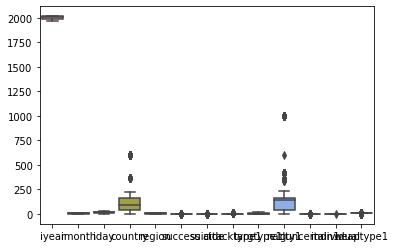

---------------------Scaling of Features data ------------------------------------------------- 
--------------------Other Feature Selection Techniques ---------------------------------------- 
-----------------------------Greedy Feature Selection---------------------------------------------
Initial Result 0.9951268659526008


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

2
[ 3  8  7  1  1 11 10  6  4  2  9 12  5]
Result after greedy feature selection:  0.9946193662141741
---------Modelling, Hyper Parameter Optimization, Cross Fold, Grid Search, Ensemble------------ 
Accuracy  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 0.9966165922316957
Confusion matrix:n [[ 679    0    0    0    0    0    0    0    0    0]
 [   1  463    0    0    0    0    0    0    0    0]
 [   0    0  683    0    0    0    0    0    0    0]
 [   0    0    0  518    0    1    0    0    0    0]
 [   0    1    0    0 1080    9    5    0    0    0]
 [

In [21]:
def main():
    
    filepath = 'C:/Users/jagri/Downloads/MachineLearning/gtd/globalterrorismdb.csv' 
    #Read Data
    print("---------------------Reading the Data from File-------------------------------------------------")
    df = read_data(filepath)
    
    #Exploratory Data Analysis
    print("---------------------Explorartory Data Analysis-------------------------------------------------")
    eda(df)
    
    #Reducing the data based on top 10 gname or terrorist groups as data is quite huge
    print("---------------------Reducing the data based for top 10 gnames only-----------------------------")
    explore_target(df)
    reduced_df = reduction(df)
    
    #Preprocessing - Missing Values
    print("---------------------Removing and Imputing Missing Values---------------------------------------")
    removed_missing_val_df = missing_values('impute',reduced_df)
    
    #Preprocessing - Encoding Categorial Target
    print("---------------------Encoding Target----------------------------------------------------------- ")
    encoded_target_df = encoding_target(removed_missing_val_df)
    
    # Feature Selection by Exploration of Data
    print("---------------------Feature Selection by Exploration of Data---------------------------------- ")
    reduced_features_df =selecting_features_by_intuition(encoded_target_df)

    #Splitting the Data for further preprocessing data
    print("---------------------Splitting Data into train and test --------------------------------------- ")
    train_features,test_features, train_labels, test_labels = split_data(reduced_features_df)
    
    #Preprocessing - Check Imbalance
    print("---------------------Check Imbalance ---------------------------------------------------------- ")
    check_imbalance(reduced_features_df, train_labels) 
    
    #Preprocessing - Check and process outliers
    print("---------------------Check and process outliers ----------------------------------------------- ")
    outliers(train_features)    
    
    #Preprocess scaling
    print("---------------------Scaling of Features data ------------------------------------------------- ")
    scaling(train_features)
    
#     #Visualizing Other Feature Selection Techniques
    print("--------------------Other Feature Selection Techniques ---------------------------------------- ")
    feature_selection('greedy_feature_selection', reduced_features_df, train_features, train_labels)
    
    #Modelling, Hyper Parameter Optimization, Cross Fold, Grid Search, Ensemble
    print("---------Modelling, Hyper Parameter Optimization, Cross Fold, Grid Search, Ensemble------------ ")

    model_name = 'random_forest'
    model(model_name, train_features,test_features, train_labels, test_labels)

    #evaluation() -- being called from model methods individually
    
    
main()